In [1]:
import pandas as pd
import numpy as np
import sqlite3

In [2]:
conn = sqlite3.connect('/Users/sominwadhwa/database.sqlite')
cur = conn.cursor()

In [3]:
countries = pd.read_sql_query("SELECT id,name from Country",conn)
matches = pd.read_sql_query("SELECT * from Match", conn)
leagues = pd.read_sql_query("SELECT * from League",conn)
teams = pd.read_sql_query("SELECT * from Team",conn)
players = pd.read_sql_query("Select * from Player", conn)
player_attr = pd.read_sql_query("Select * from Player_Attributes",conn)

In [4]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('font', size=17)
matplotlib.rc('axes', titlesize=17)
matplotlib.rc('axes', labelsize=17)
matplotlib.rc('xtick', labelsize=17)
matplotlib.rc('ytick', labelsize=17)
matplotlib.rc('legend', fontsize=17)
matplotlib.rc('figure', titlesize=20)
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [5]:
player_attr = players.merge(player_attr,on='player_fifa_api_id', suffixes='_y')
player_attr.head()

,id_,player_api_id_,player_name,player_fifa_api_id,birthday,height,weight,idy,player_api_idy,date,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1,505942,2016-02-18 00:00:00,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2,505942,2015-11-19 00:00:00,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,3,505942,2015-09-21 00:00:00,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,4,505942,2015-03-20 00:00:00,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,5,505942,2007-02-22 00:00:00,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [6]:
player_attr=player_attr.drop_duplicates(subset='player_api_id_', keep='first')
player_attr.head()

,id_,player_api_id_,player_name,player_fifa_api_id,birthday,height,weight,idy,player_api_idy,date,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1,505942,2016-02-18 00:00:00,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
5,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146,6,155782,2016-04-21 00:00:00,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
38,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163,39,162549,2016-01-07 00:00:00,...,68.0,61.0,23.0,22.0,24.0,16.0,11.0,12.0,9.0,13.0
64,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198,65,30572,2016-04-21 00:00:00,...,54.0,37.0,72.0,71.0,68.0,15.0,12.0,13.0,12.0,11.0
87,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154,88,23780,2015-12-24 00:00:00,...,41.0,45.0,75.0,73.0,71.0,8.0,6.0,16.0,12.0,11.0


In [7]:
player_attr = player_attr.fillna(0)
player_attr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11060 entries, 0 to 183919
Data columns (total 48 columns):
id_                    11060 non-null int64
player_api_id_         11060 non-null int64
player_name            11060 non-null object
player_fifa_api_id     11060 non-null int64
birthday               11060 non-null object
height                 11060 non-null float64
weight                 11060 non-null int64
idy                    11060 non-null int64
player_api_idy         11060 non-null int64
date                   11060 non-null object
overall_rating         11060 non-null float64
potential              11060 non-null float64
preferred_foot         11060 non-null object
attacking_work_rate    11060 non-null object
defensive_work_rate    11060 non-null object
crossing               11060 non-null float64
finishing              11060 non-null float64
heading_accuracy       11060 non-null float64
short_passing          11060 non-null float64
volleys                11060 non-n

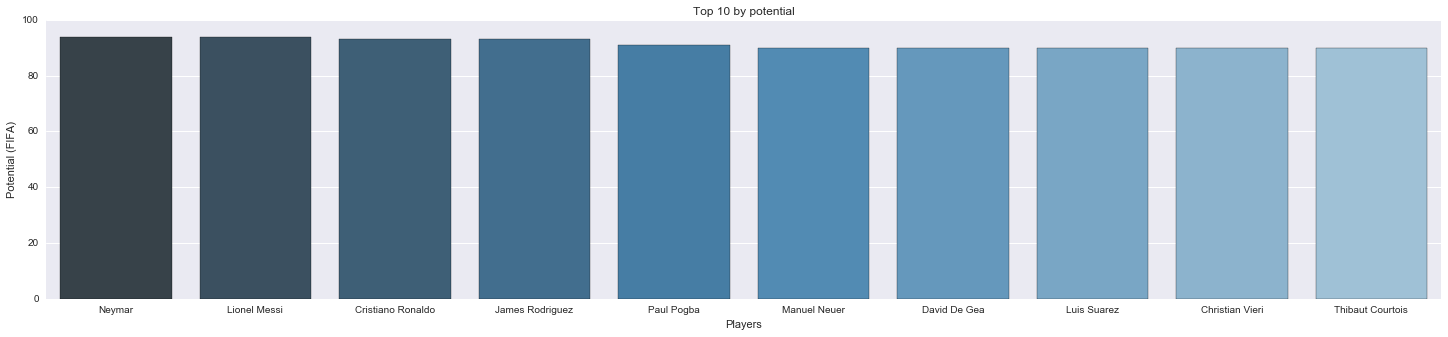

In [8]:
player_attr = player_attr.sort_values('potential', ascending=False)
player_by_potential = player_attr[['player_name','potential']].head(10)
plt.figure(figsize=(25,5))
ax = sns.barplot(x = 'player_name', y='potential', data=player_by_potential, palette="Blues_d")
plt.xlabel("Players")
plt.ylabel("Potential (FIFA)")
plt.title("Top 10 by potential")
plt.show()

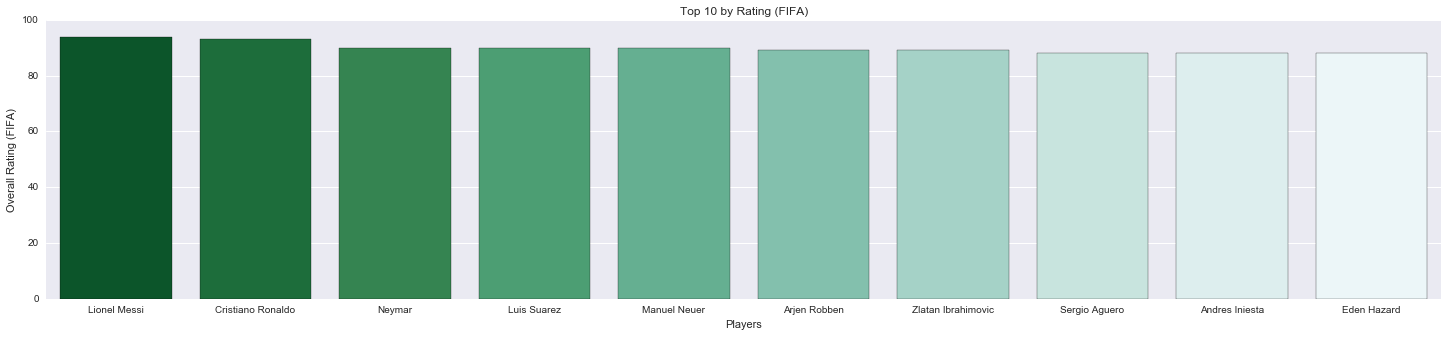

In [9]:
player_attr = player_attr.sort_values('overall_rating', ascending=False)
player_by_potential = player_attr[['player_name','overall_rating']].head(10)
plt.figure(figsize=(25,5))
ax = sns.barplot(x = 'player_name', y='overall_rating', data=player_by_potential, palette="BuGn_r")
plt.xlabel("Players")
plt.ylabel("Overall Rating (FIFA)")
plt.title("Top 10 by Rating (FIFA)")
plt.show()

In [10]:
player_attr.drop(['id_','player_fifa_api_id','date','attacking_work_rate','defensive_work_rate'], axis=1,inplace=True)

Since there are way too many individual statistical attributes to visualize, we take help of the various clustering & dimensionality reduction techniques available to us. 

**Why SNE over PCA?** Because of the non-linear nature of the data.

## t-SNE of Player Stats

In [49]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from bokeh.io import output_notebook
from bokeh.models import HoverTool
from bokeh.plotting import figure, ColumnDataSource, show
from bokeh.charts import Scatter
output_notebook()

Loading BokehJS ...

In [12]:
player_attr.drop(['birthday','height','weight','player_api_idy','preferred_foot','idy'], inplace=True, axis=1)
player_attr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11060 entries, 102463 to 59783
Data columns (total 37 columns):
player_api_id_        11060 non-null int64
player_name           11060 non-null object
overall_rating        11060 non-null float64
potential             11060 non-null float64
crossing              11060 non-null float64
finishing             11060 non-null float64
heading_accuracy      11060 non-null float64
short_passing         11060 non-null float64
volleys               11060 non-null float64
dribbling             11060 non-null float64
curve                 11060 non-null float64
free_kick_accuracy    11060 non-null float64
long_passing          11060 non-null float64
ball_control          11060 non-null float64
acceleration          11060 non-null float64
sprint_speed          11060 non-null float64
agility               11060 non-null float64
reactions             11060 non-null float64
balance               11060 non-null float64
shot_power            11060 non-nu

In [14]:
non_stat = ['player_api_id_','player_name','potential','overall_rating']
stats = [col for col in player_attr.columns if col not in non_stat]
stats

['crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'dribbling',
 'curve',
 'free_kick_accuracy',
 'long_passing',
 'ball_control',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes']

In [16]:
ss = StandardScaler()
tmp = ss.fit_transform(player_attr[stats])

In [17]:
model = TSNE(n_components=2, random_state=0)

In [18]:
tsne_comp = model.fit_transform(tmp)

In [29]:
temp = player_attr[non_stat]
temp['Component_1'],temp['Component_2'] = tsne_comp[:,0],tsne_comp[:,1]
top_20 = temp[temp['overall_rating'] >= 80]

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [50]:
tools_ = 'box_zoom,pan,save,resize,reset,tap,wheel_zoom'
fig = figure(tools=tools_, title='t-SNE of Players (FIFA stats)', responsive=True, x_axis_label='Component 1', y_axis_label='Component 2')
source = ColumnDataSource(top_20)
hover = HoverTool()
hover.tooltips = [('Player','@player_name'),]
colors = ["#%02x%02x%02x" % (int(r), int(g), 150) for r, g in zip(np.floor(50+2*top_20['Component_1']), np.floor(30+2*top_20['Component_2']))]
fig.scatter(top_20['Component_1'],top_20['Component_2'], source=source, size=12,fill_alpha=0.4,line_color=None,fill_color=colors)
fig.add_tools(hover)
show(fig)

//anaconda/lib/python3.5/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
Supplying a user-defined data source AND iterable values to glyph methods is deprecated.

See https://github.com/bokeh/bokeh/issues/2056 for more information.

  warn(message)
//anaconda/lib/python3.5/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
Supplying a user-defined data source AND iterable values to glyph methods is deprecated.

See https://github.com/bokeh/bokeh/issues/2056 for more information.

  warn(message)
//anaconda/lib/python3.5/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
Supplying a user-defined data source AND iterable values to glyph methods is deprecated.

See https://github.com/bokeh/bokeh/issues/2056 for more information.

  warn(message)
